In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/DV Project/housing.csv")

In [6]:
dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
dataset = dataset.dropna()

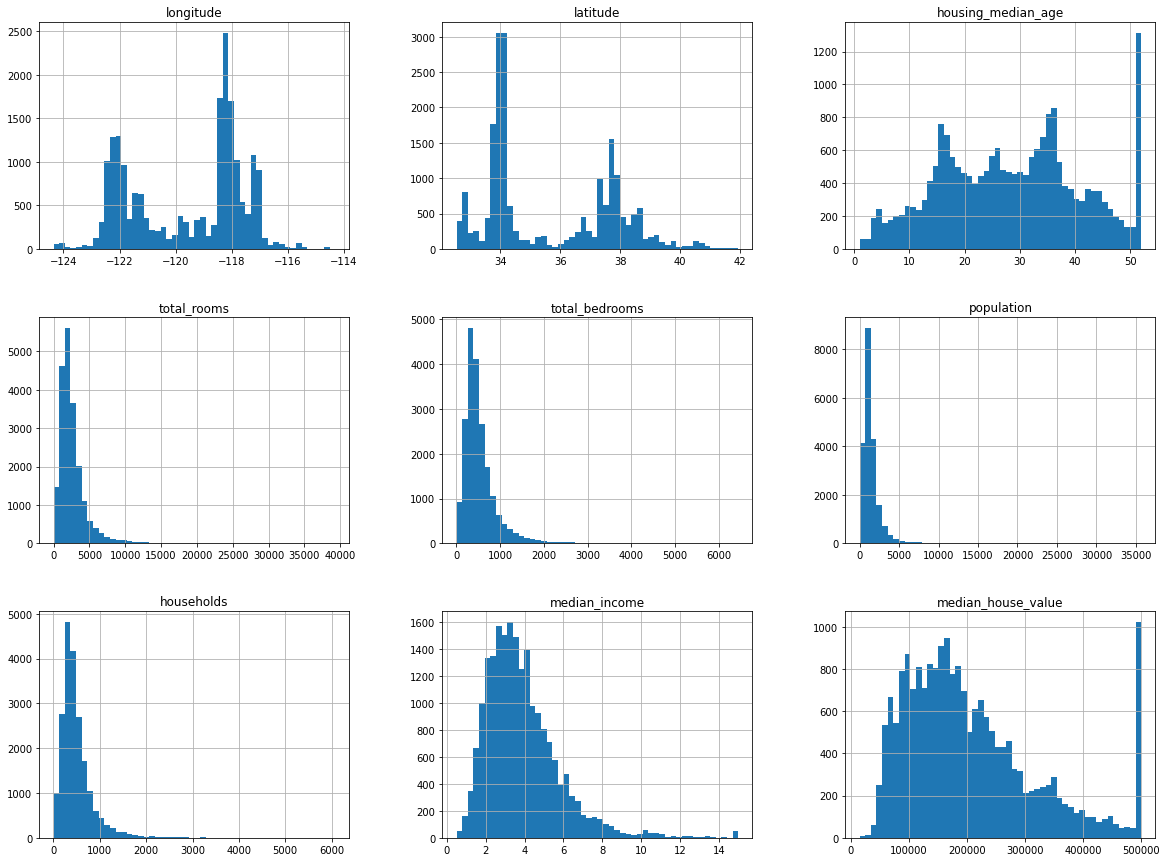

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
dataset.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
dataset['ocean_proximity'] = dataset['ocean_proximity'].map({'NEAR BAY':1, '<1H OCEAN':2, 'INLAND':3, 'NEAR OCEAN':4, 'ISLAND':5})

In [12]:
dataset.ocean_proximity.unique()

array([1, 2, 3, 4, 5])

### Split the data into training and test sets

In [13]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

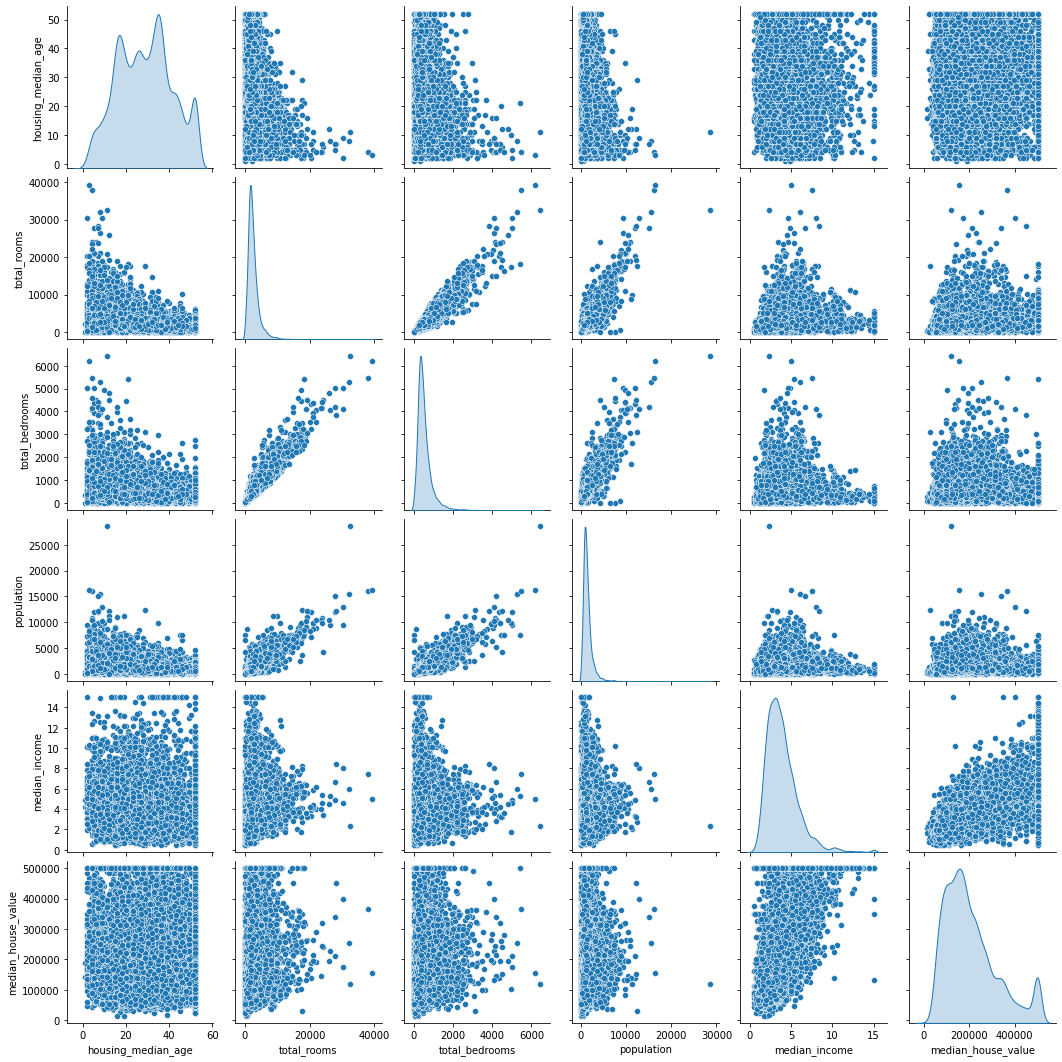

In [ ]:
sns.pairplot(train_dataset[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'median_income',
       'median_house_value']], diag_kind='kde')

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('median_house_value')
test_labels = test_features.pop('median_house_value')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
longitude,-119.564154,2.002618
latitude,35.630318,2.138574
housing_median_age,28.664505,12.556764
total_rooms,2622.235776,2169.548287
total_bedrooms,535.281659,418.469078
population,1416.087055,1103.842065
households,496.758167,379.109535
median_income,3.869337,1.902228
median_house_value,206916.154411,115676.394484
ocean_proximity,2.468371,0.853551


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[-119.564   35.63    28.664 2622.236  535.282 1416.088  496.758    3.869
     2.468]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[-117.08   32.7    37.   2176.    418.   1301.    375.      2.88    4.  ]]

Normalized: [[ 1.24 -1.37  0.66 -0.21 -0.28 -0.1  -0.32 -0.52  1.79]]


In [ ]:
median_age = np.array(train_features['housing_median_age'])

median_age_normalizer = layers.Normalization(input_shape=[1,], axis=None)
median_age_normalizer.adapt(median_age)

In [ ]:
median_age_model = tf.keras.Sequential([
    median_age_normalizer,
    layers.Dense(units=1)
])

median_age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
median_age_model.predict(median_age[:500])

array([[-0.974],
       [ 1.012],
       [ 2.063],
       [-2.726],
       [-0.39 ],
       [ 0.428],
       [ 1.012],
       [ 1.479],
       [ 1.479],
       [ 2.414],
       [ 0.895],
       [-1.674],
       [-1.908],
       [ 0.428],
       [-1.207],
       [ 0.895],
       [-0.74 ],
       [-0.857],
       [-0.74 ],
       [-0.39 ],
       [-0.974],
       [ 1.362],
       [-2.726],
       [-2.375],
       [ 2.297],
       [-0.974],
       [-1.09 ],
       [-2.492],
       [ 0.311],
       [-1.908],
       [ 1.012],
       [-1.09 ],
       [-0.623],
       [ 1.012],
       [-0.74 ],
       [-0.506],
       [ 1.012],
       [ 2.764],
       [-1.908],
       [ 0.895],
       [-0.156],
       [ 0.662],
       [-1.09 ],
       [-1.558],
       [ 0.428],
       [-0.857],
       [ 1.713],
       [-0.623],
       [ 2.297],
       [-0.623],
       [ 1.479],
       [ 2.531],
       [ 0.895],
       [-0.74 ],
       [ 0.662],
       [-0.39 ],
       [-0.39 ],
       [ 2.297],
       [ 0.311

In [ ]:
median_age_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),
    loss='mean_absolute_error')

In [ ]:
%%time
history = median_age_model.fit(
    train_features['housing_median_age'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 43.8 s, sys: 3.83 s, total: 47.6 s
Wall time: 41.3 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,187517.500000,186773.468750,95
96,187313.203125,186569.125000,96
97,187108.812500,186364.828125,97
98,186904.390625,186160.515625,98
99,186700.046875,185956.250000,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Median_house_price]')
  plt.legend(['train','test'],loc = 'upper right')
  plt.grid(True)
  plt.show()

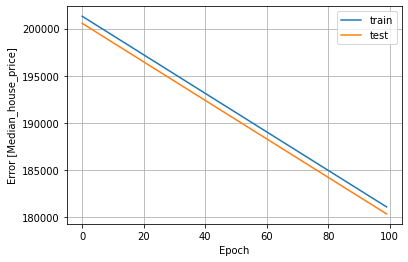

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['median_age_model'] = median_age_model.evaluate(
    test_features['median_income'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 15, 15)
y = median_age_model.predict(x)

In [ ]:
def plot_median_age(x, y):
  plt.scatter(train_features['median_income'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('housing_median_age')
  plt.ylabel('median_house_value')
  plt.legend()

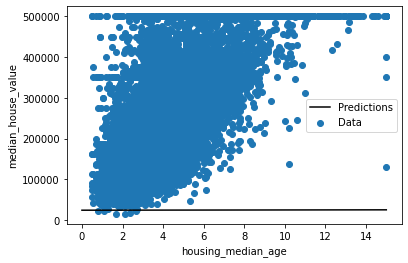

In [ ]:
plot_median_age(x, y)

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:500])

array([[-0.382],
       [-0.723],
       [-2.047],
       [ 1.765],
       [ 0.599],
       [-0.042],
       [-0.566],
       [-0.345],
       [-0.523],
       [-1.89 ],
       [-0.602],
       [ 0.391],
       [ 0.781],
       [-1.895],
       [ 0.377],
       [-0.515],
       [ 0.609],
       [-0.168],
       [ 0.493],
       [ 1.53 ],
       [ 1.167],
       [-0.696],
       [ 1.52 ],
       [ 1.916],
       [-1.314],
       [ 0.509],
       [-0.606],
       [ 1.186],
       [-0.48 ],
       [ 1.829],
       [-0.562],
       [ 1.227],
       [ 0.254],
       [-1.411],
       [ 0.406],
       [ 0.329],
       [-0.314],
       [ 0.1  ],
       [ 0.736],
       [ 0.672],
       [-0.064],
       [-0.579],
       [ 0.212],
       [ 0.08 ],
       [ 0.05 ],
       [ 1.876],
       [-0.929],
       [ 0.564],
       [-1.177],
       [-0.639],
       [-0.655],
       [-0.223],
       [-1.134],
       [ 0.224],
       [-0.644],
       [-0.541],
       [-0.045],
       [-1.329],
       [-0.314

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.596],
       [ 0.56 ],
       [ 0.721],
       [-0.427],
       [ 0.768],
       [-0.66 ],
       [ 0.052],
       [ 0.48 ],
       [-0.283]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 45.4 s, sys: 3.77 s, total: 49.2 s
Wall time: 42 s


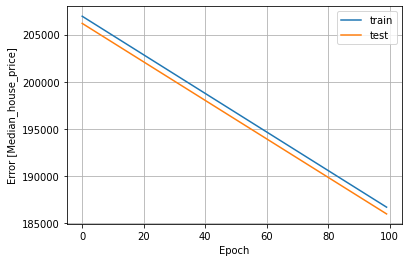

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

### Build Model

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_median_age_model = build_and_compile_model(median_age_normalizer)

In [ ]:
dnn_median_age_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 64)                128       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_median_age_model.fit(
    train_features['housing_median_age'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 1min 17s, sys: 5.35 s, total: 1min 23s
Wall time: 1min 16s


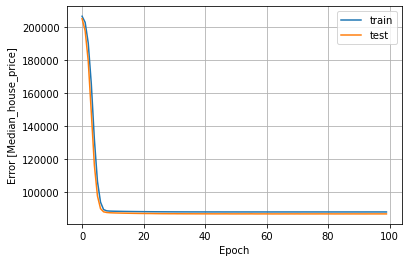

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 15,15)
y = dnn_median_age_model.predict(x)

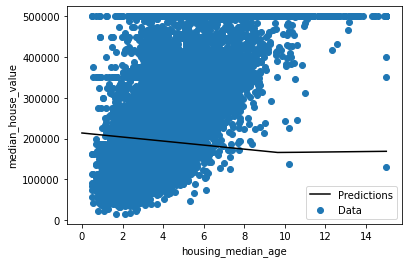

In [ ]:
plot_median_age(x, y)

In [ ]:
test_results['dnn_median_age_model'] = dnn_median_age_model.evaluate(
    test_features['housing_median_age'], test_labels,
    verbose=0)

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_15 (Dense)            (None, 64)                640       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 1min 19s, sys: 5.71 s, total: 1min 25s
Wall time: 1min 15s


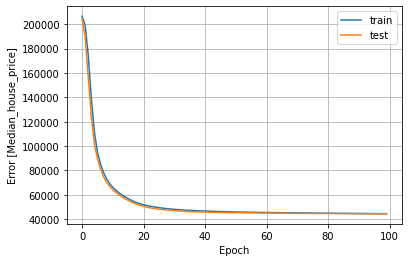

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [median_house_value]']).T

,Mean absolute error [median__house_value]
median_age_model,182088.234375
linear_model,186218.609375
dnn_median_age_model,86671.062500
dnn_model,45125.000000


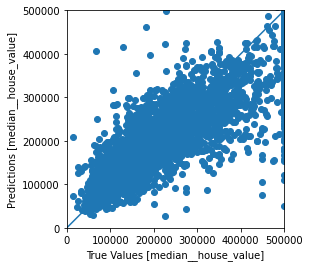

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 500001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

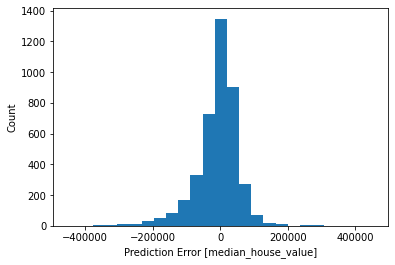

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

### 3 different Layers and constant Neurons

In [ ]:
# 1
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)

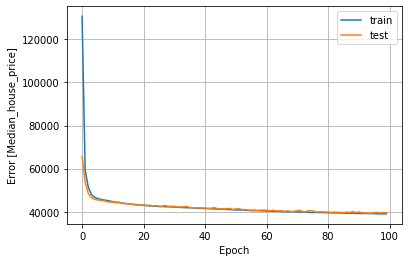

CPU times: user 1min 49s, sys: 8.75 s, total: 1min 58s
Wall time: 2min 22s


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)

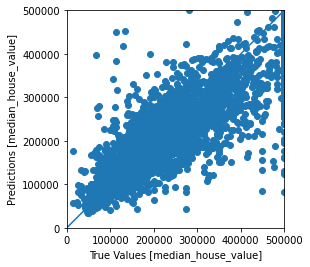

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 500001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

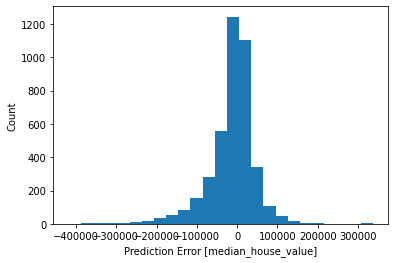

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

In [ ]:
# 2
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_28 (Dense)            (None, 64)                640       
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                     

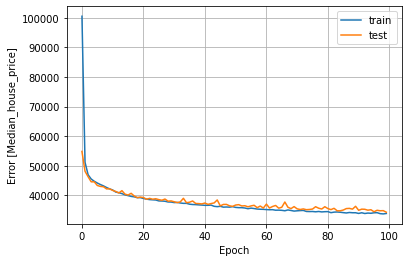

CPU times: user 1min 44s, sys: 8.26 s, total: 1min 53s
Wall time: 2min 22s


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)

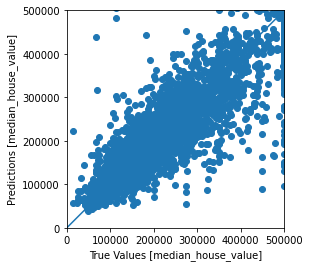

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 500001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

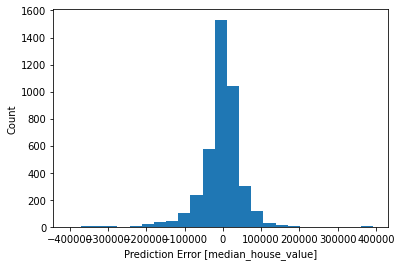

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

In [ ]:
# 3
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                        

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)


NameError: ignored

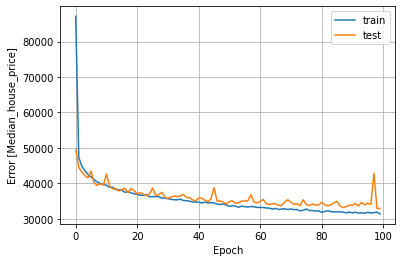

In [ ]:
plot_loss(history)

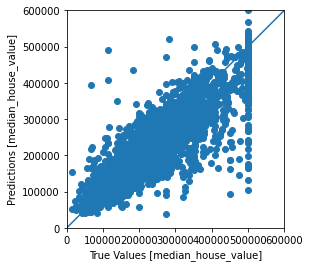

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

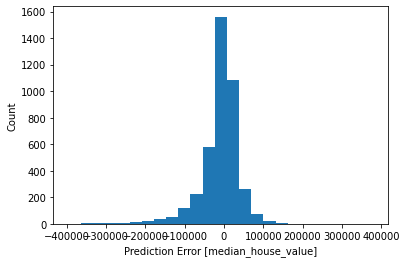

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

### Vaiaion in No. of Neurons

In [ ]:
# 1
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

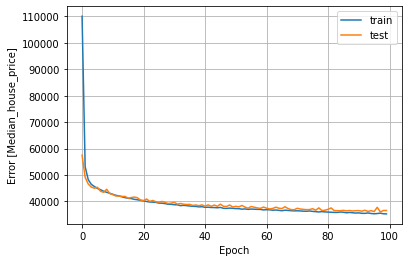

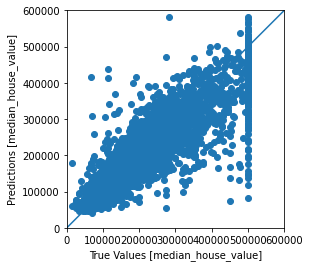

In [ ]:
dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
# Test Prediction
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


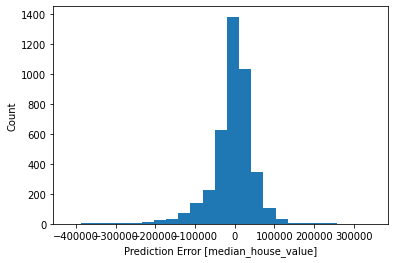

In [ ]:
# Error
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

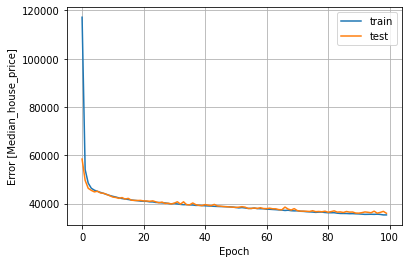

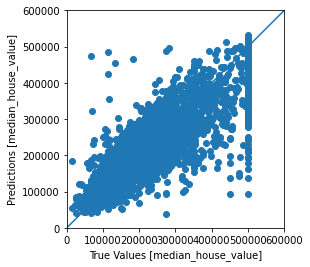

In [ ]:
# 2

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
# Normalization
dnn_model = build_and_compile_model(normalizer)
# Fitting Model
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
# Test Prediction
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


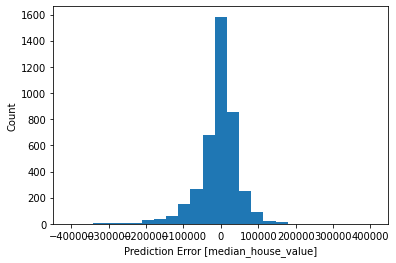

In [ ]:
# Error
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

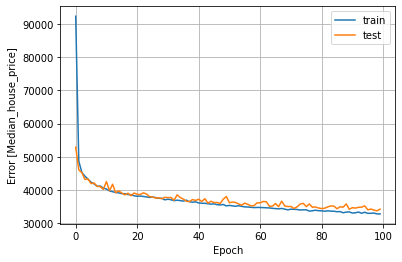

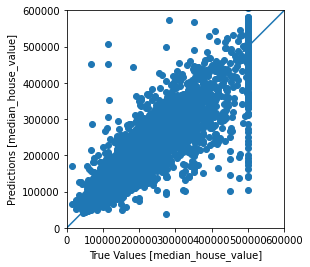

In [ ]:
# 3

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
# Normalization
dnn_model = build_and_compile_model(normalizer)
# Fitting Model
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
# Test Prediction
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


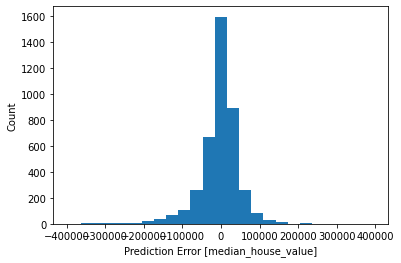

In [ ]:
# Error
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

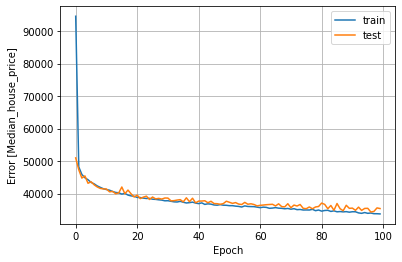

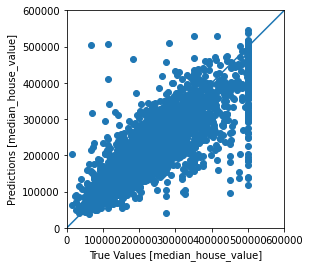

In [ ]:
# 4

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
# Normalization
dnn_model = build_and_compile_model(normalizer)
# Fitting Model
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
# Test Prediction
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


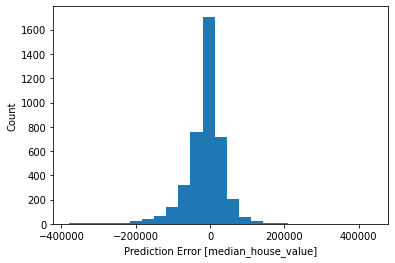

In [ ]:
# Error
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

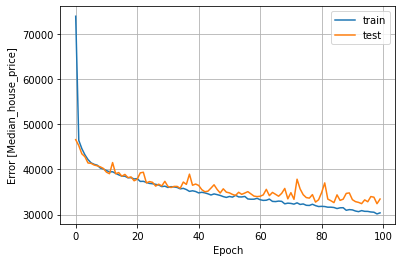

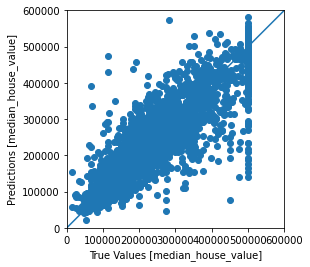

In [ ]:
# 5

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
# Normalization
dnn_model = build_and_compile_model(normalizer)
# Fitting Model
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
# Test Prediction
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


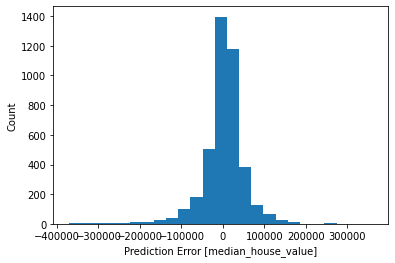

In [ ]:
# Error
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

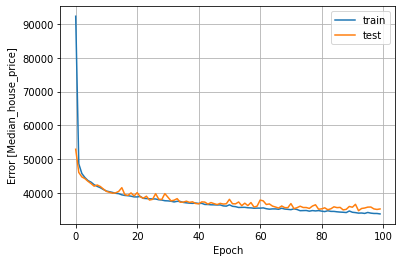

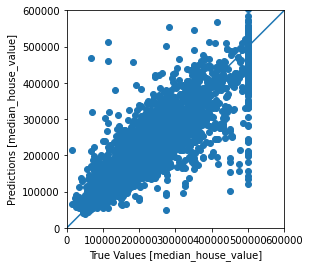

In [ ]:
# 6

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
# Normalization
dnn_model = build_and_compile_model(normalizer)
# Fitting Model
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
# Test Prediction
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


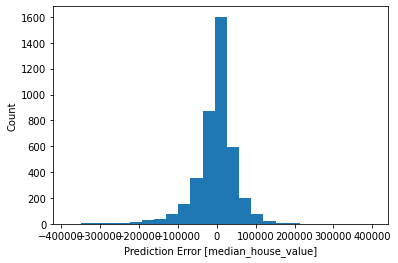

In [ ]:
# Error
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

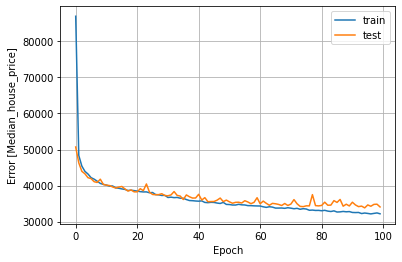

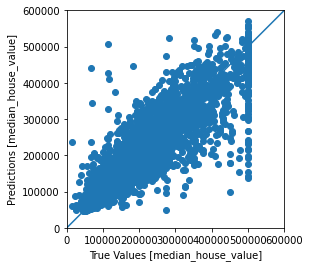

In [ ]:
# 7

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
# Normalization
dnn_model = build_and_compile_model(normalizer)
# Fitting Model
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
# Test Prediction
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


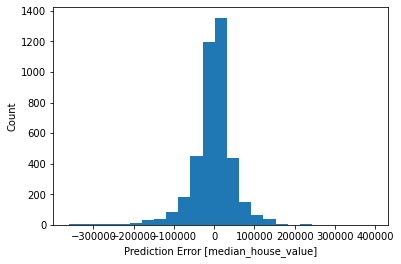

In [ ]:
# Error
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

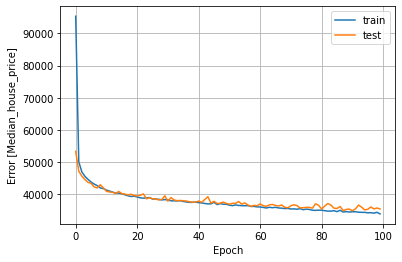

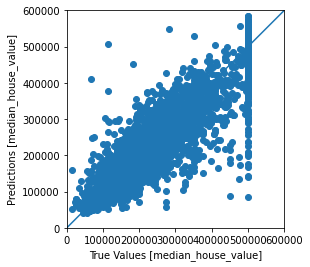

In [ ]:
# 8

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
# Normalization
dnn_model = build_and_compile_model(normalizer)
# Fitting Model
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
# Test Prediction
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


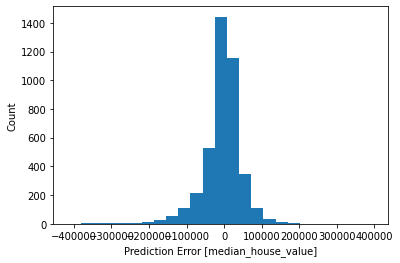

In [ ]:
# Error
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

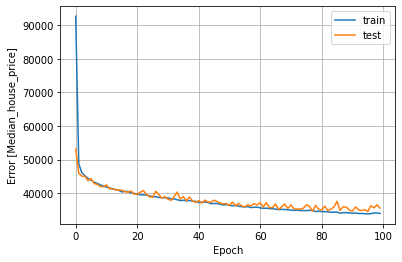

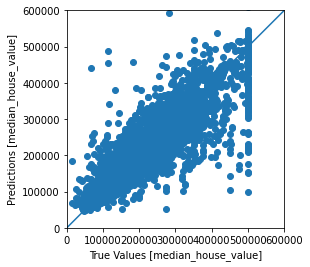

In [ ]:
# 9

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
# Normalization
dnn_model = build_and_compile_model(normalizer)
# Fitting Model
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
# Test Prediction
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


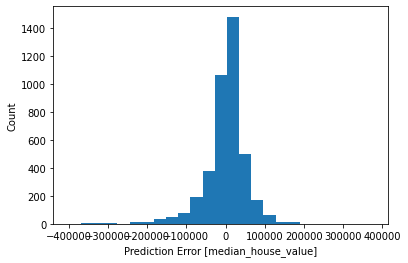

In [ ]:
# Error
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')

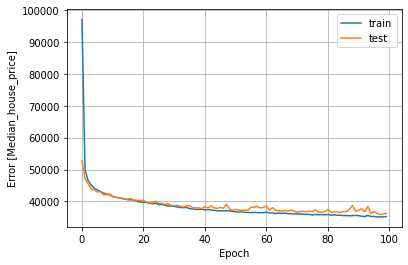

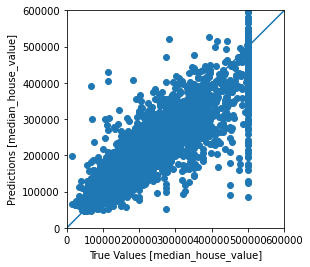

In [ ]:
# 10

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
# Normalization
dnn_model = build_and_compile_model(normalizer)
# Fitting Model
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
# Test Prediction
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [median_house_value]')
plt.ylabel('Predictions [median_house_value]')
lims = [0, 600001]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


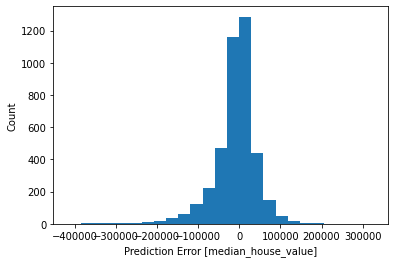

In [ ]:
# Error
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [median_house_value]')
_ = plt.ylabel('Count')